In [6]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

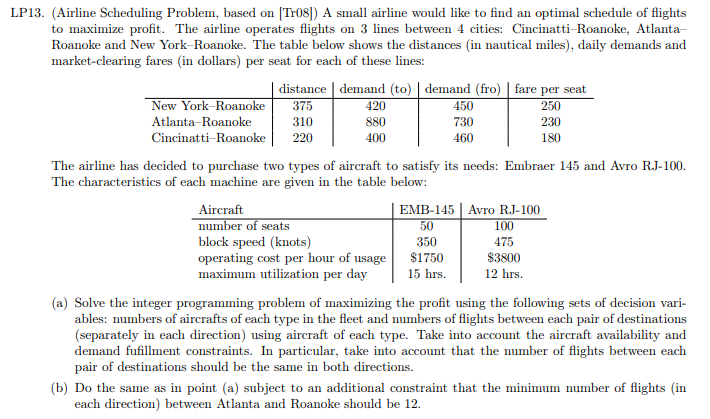

1 <- Roanoke

2 <- New York

3 <- Atlanta

4 <- Cincinati

In [3]:
#demands
d_1_2 = 450
d_2_1 = 420
d_1_3 = 730
d_3_1 = 880
d_1_4 = 460
d_4_1 = 400

#fares
f_1_2 = 250
f_1_3 = 230
f_1_4 = 180

#times
t_1_2_E = 375/350
t_1_2_A = 375/475
t_1_3_E = 310/350
t_1_3_A = 310/475
t_1_4_E = 220/350
t_1_4_A = 220/475

#costs
c_1_2_E = 1750 * t_1_2_E
c_1_2_A = 3800 * t_1_2_A
c_1_3_E = 1750 * t_1_3_E
c_1_3_A = 3800 * t_1_3_A
c_1_4_E = 1750 * t_1_4_E
c_1_4_A = 3800 * t_1_4_A

#seats
n_E = 50
n_A = 100

#utilization
u_E = 15
u_A = 12

In [47]:
model = LpProblem(name="Airline", sense=LpMaximize)

In [48]:
#decision variables
N_1_2_E = LpVariable(name="N_1_2_E", lowBound=0, cat="Integer")
N_1_2_A = LpVariable(name="N_1_2_A", lowBound=0, cat="Integer")
N_2_1_E = LpVariable(name="N_2_1_E", lowBound=0, cat="Integer")
N_2_1_A = LpVariable(name="N_2_1_A", lowBound=0, cat="Integer")

N_1_3_E = LpVariable(name="N_1_3_E", lowBound=0, cat="Integer")
N_1_3_A = LpVariable(name="N_1_3_A", lowBound=0, cat="Integer")
N_3_1_E = LpVariable(name="N_3_1_E", lowBound=0, cat="Integer")
N_3_1_A = LpVariable(name="N_3_1_A", lowBound=0, cat="Integer")

N_1_4_E = LpVariable(name="N_1_4_E", lowBound=0, cat="Integer")
N_1_4_A = LpVariable(name="N_1_4_A", lowBound=0, cat="Integer")
N_4_1_E = LpVariable(name="N_4_1_E", lowBound=0, cat="Integer")
N_4_1_A = LpVariable(name="N_4_1_A", lowBound=0, cat="Integer")

P_A = LpVariable(name="P_A", lowBound=0, cat="Integer")
P_E = LpVariable(name="P_E", lowBound=0, cat="Integer")

In [49]:
#objective function
obj_func = ((d_1_2+d_2_1)*f_1_2 + (d_1_3+d_3_1)*f_1_3 + (d_1_4+d_4_1)*f_1_4 - (N_1_2_E+N_2_1_E)*c_1_2_E
            - (N_1_2_A+N_2_1_A)*c_1_2_A - (N_1_3_E+N_3_1_E)*c_1_3_E - (N_1_3_A+N_3_1_A)*c_1_3_A
            - (N_1_4_E+N_4_1_E)*c_1_4_E - (N_1_4_A+N_4_1_A)*c_1_4_A)
model += obj_func

In [50]:
#demand constraints
model += n_E*N_1_2_E + n_A*N_1_2_A >= d_1_2
model += n_E*N_2_1_E + n_A*N_2_1_A >= d_2_1

model += n_E*N_1_3_E + n_A*N_1_3_A >= d_1_3
model += n_E*N_3_1_E + n_A*N_3_1_A >= d_3_1

model += n_E*N_1_4_E + n_A*N_1_4_A >= d_1_4
model += n_E*N_4_1_E + n_A*N_4_1_A >= d_4_1

In [51]:
#availibility constraints
model += (N_1_2_E+N_2_1_E)*t_1_2_E + (N_1_3_E+N_3_1_E)*t_1_3_E + (N_1_4_E+N_4_1_E)*t_1_4_E <= u_E*P_E
model += (N_1_2_A+N_2_1_A)*t_1_2_A + (N_1_3_A+N_3_1_A)*t_1_3_A + (N_1_4_A+N_4_1_A)*t_1_4_E <= u_A*P_A

In [52]:
#equal number of flights constraints
model += N_1_2_E + N_1_2_A == N_2_1_E + N_2_1_A
model += N_1_3_E + N_1_3_A == N_3_1_E + N_3_1_A
model += N_1_4_E + N_1_4_A == N_4_1_E + N_4_1_A

In [43]:
model

Airline:
MAXIMIZE
-3000.0*N_1_2_A + -1875.0*N_1_2_E + -2480.0*N_1_3_A + -1550.0*N_1_3_E + -1760.0*N_1_4_A + -1100.0*N_1_4_E + -3000.0*N_2_1_A + -1875.0*N_2_1_E + -2480.0*N_3_1_A + -1550.0*N_3_1_E + -1760.0*N_4_1_A + -1100.0*N_4_1_E + 742600.0
SUBJECT TO
_C1: 100 N_1_2_A + 50 N_1_2_E >= 450

_C2: 100 N_2_1_A + 50 N_2_1_E >= 420

_C3: 100 N_1_3_A + 50 N_1_3_E >= 730

_C4: 100 N_3_1_A + 50 N_3_1_E >= 880

_C5: 100 N_1_4_A + 50 N_1_4_E >= 460

_C6: 100 N_4_1_A + 50 N_4_1_E >= 400

_C7: 1.07142857143 N_1_2_E + 0.885714285714 N_1_3_E + 0.628571428571 N_1_4_E
 + 1.07142857143 N_2_1_E + 0.885714285714 N_3_1_E + 0.628571428571 N_4_1_E
 - 15 P_E <= 0

_C8: 0.789473684211 N_1_2_A + 0.652631578947 N_1_3_A + 0.628571428571 N_1_4_A
 + 0.789473684211 N_2_1_A + 0.652631578947 N_3_1_A + 0.628571428571 N_4_1_A
 - 12 P_A <= 0

_C9: N_1_2_A + N_1_2_E - N_2_1_A - N_2_1_E = 0

_C10: N_1_3_A + N_1_3_E - N_3_1_A - N_3_1_E = 0

_C11: N_1_4_A + N_1_4_E - N_4_1_A - N_4_1_E = 0

VARIABLES
0 <= N_1_2_A Integer
0 <

In [44]:
model.solve()

1

In [45]:
for var in model.variables():
    print(f"{var.name}: {var.value()}")

N_1_2_A: 4.0
N_1_2_E: 1.0
N_1_3_A: 6.0
N_1_3_E: 3.0
N_1_4_A: 5.0
N_1_4_E: 0.0
N_2_1_A: 4.0
N_2_1_E: 1.0
N_3_1_A: 9.0
N_3_1_E: 0.0
N_4_1_A: 3.0
N_4_1_E: 2.0
P_A: 2.0
P_E: 1.0


In [46]:
print(f"objective: {model.objective.value()}")

objective: 656720.0


# b

In [53]:
#minimum number of flights constraints
model += N_1_3_E + N_1_3_A >= 12
model += N_3_1_E + N_3_1_A >= 12

In [54]:
model

Airline:
MAXIMIZE
-3000.0*N_1_2_A + -1875.0*N_1_2_E + -2480.0*N_1_3_A + -1550.0*N_1_3_E + -1760.0*N_1_4_A + -1100.0*N_1_4_E + -3000.0*N_2_1_A + -1875.0*N_2_1_E + -2480.0*N_3_1_A + -1550.0*N_3_1_E + -1760.0*N_4_1_A + -1100.0*N_4_1_E + 742600.0
SUBJECT TO
_C1: 100 N_1_2_A + 50 N_1_2_E >= 450

_C2: 100 N_2_1_A + 50 N_2_1_E >= 420

_C3: 100 N_1_3_A + 50 N_1_3_E >= 730

_C4: 100 N_3_1_A + 50 N_3_1_E >= 880

_C5: 100 N_1_4_A + 50 N_1_4_E >= 460

_C6: 100 N_4_1_A + 50 N_4_1_E >= 400

_C7: 1.07142857143 N_1_2_E + 0.885714285714 N_1_3_E + 0.628571428571 N_1_4_E
 + 1.07142857143 N_2_1_E + 0.885714285714 N_3_1_E + 0.628571428571 N_4_1_E
 - 15 P_E <= 0

_C8: 0.789473684211 N_1_2_A + 0.652631578947 N_1_3_A + 0.628571428571 N_1_4_A
 + 0.789473684211 N_2_1_A + 0.652631578947 N_3_1_A + 0.628571428571 N_4_1_A
 - 12 P_A <= 0

_C9: N_1_2_A + N_1_2_E - N_2_1_A - N_2_1_E = 0

_C10: N_1_3_A + N_1_3_E - N_3_1_A - N_3_1_E = 0

_C11: N_1_4_A + N_1_4_E - N_4_1_A - N_4_1_E = 0

_C12: N_1_3_A + N_1_3_E >= 12

_C1

In [55]:
model.solve()

1

In [56]:
for var in model.variables():
    print(f"{var.name}: {var.value()}")

N_1_2_A: 4.0
N_1_2_E: 1.0
N_1_3_A: 3.0
N_1_3_E: 9.0
N_1_4_A: 5.0
N_1_4_E: 0.0
N_2_1_A: 4.0
N_2_1_E: 1.0
N_3_1_A: 6.0
N_3_1_E: 6.0
N_4_1_A: 3.0
N_4_1_E: 2.0
P_A: 2.0
P_E: 2.0
